<a href="https://colab.research.google.com/github/adamsait1/-Deep-Convolutional-Generative-Adversarial-Network/blob/master/transferlearningepoch100_batch32_070521.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras


os.listdir("/content/drive/MyDrive/Transfer_learning/transfer_learning")

['val', 'test', 'train']

In [ ]:
len(os.listdir("/content/drive/MyDrive/Transfer_learning/transfer_learning/train/Diseased"))

152

Train set:
Diseased=152
Normal=126
Test set:
Diseased=56
Normal=27
Validation set:
Diseased=28
Normal=28


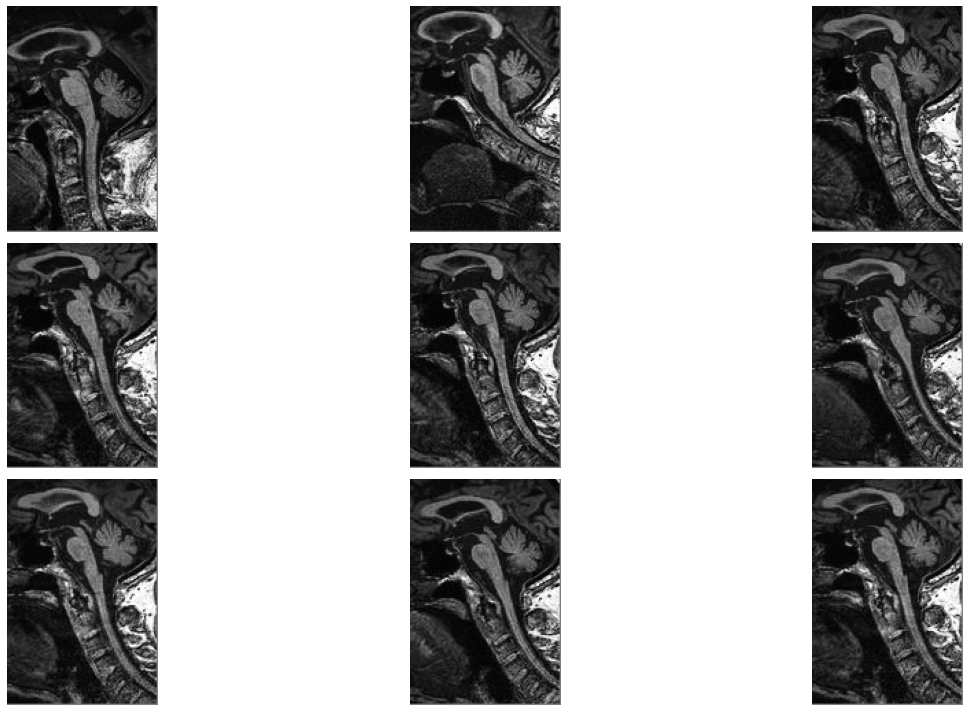

In [ ]:
train_dir = "/content/drive/MyDrive/Transfer_learning/transfer_learning/train"
test_dir = "/content/drive/MyDrive/Transfer_learning/transfer_learning/test"
val_dir = "/content/drive/MyDrive/Transfer_learning/transfer_learning/val"

print("Train set:\n========================================")
num_Diseased = len(os.listdir(os.path.join(train_dir, 'Diseased')))
num_Normal = len(os.listdir(os.path.join(train_dir, 'Normal')))
print(f"Diseased={num_Diseased}")
print(f"Normal={num_Normal}")

print("Test set:\n========================================")
print(f"Diseased={len(os.listdir(os.path.join(test_dir,'Diseased')))}")
print(f"Normal={len(os.listdir(os.path.join(test_dir, 'Normal')))}")

print("Validation set:\n========================================")
print(f"Diseased={len(os.listdir(os.path.join(val_dir, 'Diseased')))}")
print(f"Normal={len(os.listdir(os.path.join(val_dir, 'Normal')))}")

Diseased = os.listdir("/content/drive/MyDrive/Transfer_learning/transfer_learning/train/Diseased")
Diseased_dir = "/content/drive/MyDrive/Transfer_learning/transfer_learning/train/Diseased"

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(Diseased_dir, Diseased[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.tight_layout()

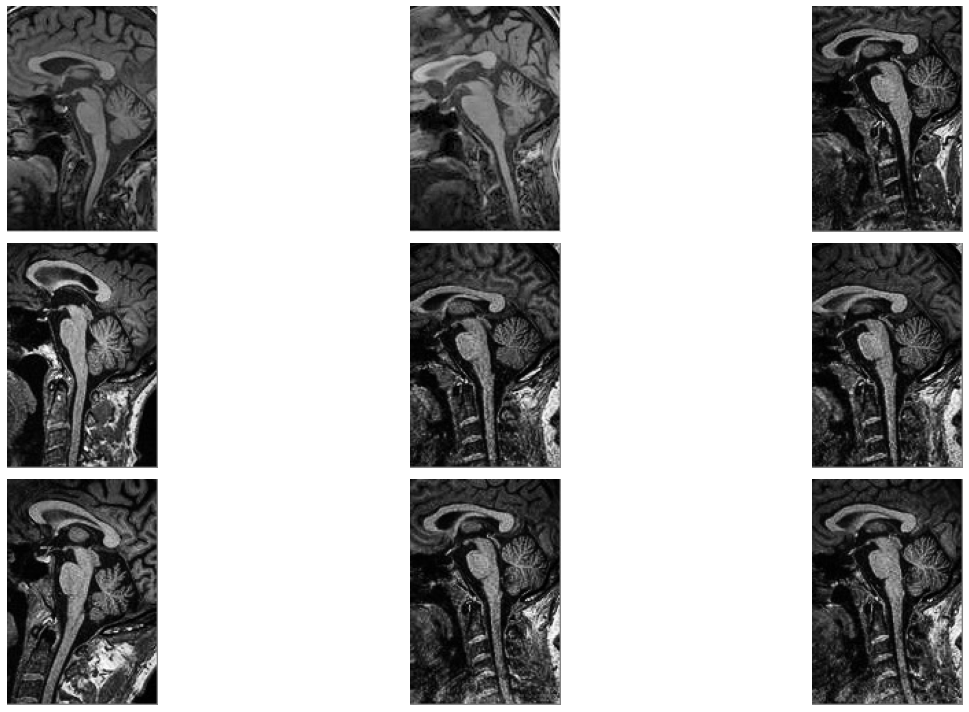

In [ ]:
Normal = os.listdir("/content/drive/MyDrive/Transfer_learning/transfer_learning/train/Normal")
Normal_dir = "/content/drive/MyDrive/Transfer_learning/transfer_learning/train/Normal"

plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(Normal_dir, Normal[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    
plt.tight_layout()

The dimensions of the image are 165 pixels width and 110 pixels height, one single color channel.
The maximum pixel value is 170.0000 and the minimum is 0.0000
The mean value of the pixels is 43.0974 and the standard deviation is 24.3510


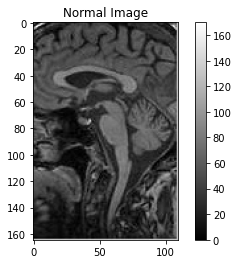

In [ ]:
Normal_img = os.listdir("/content/drive/MyDrive/Transfer_learning/transfer_learning/train/Normal")[0]
Normal_dir = "/content/drive/MyDrive/Transfer_learning/transfer_learning/train/Normal"
sample_img = plt.imread(os.path.join(Normal_dir, Normal_img))
plt.imshow(sample_img, cmap='gray')
plt.colorbar()
plt.title('Normal Image')

print(f"The dimensions of the image are {sample_img.shape[0]} pixels width and {sample_img.shape[1]} pixels height, one single color channel.")
print(f"The maximum pixel value is {sample_img.max():.4f} and the minimum is {sample_img.min():.4f}")
print(f"The mean value of the pixels is {sample_img.mean():.4f} and the standard deviation is {sample_img.std():.4f}")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, ' Pixels in Image')

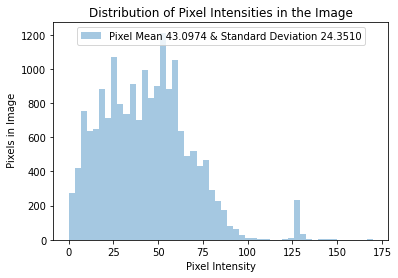

In [ ]:
sns.distplot(sample_img.ravel(),
            label=f"Pixel Mean {np.mean(sample_img):.4f} & Standard Deviation {np.std(sample_img):.4f}", kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel(' Pixels in Image')

**2. Image Preprocessing**
Before training, we'll first modify your images to be better suited for training a convolutional neural network. For this task we'll use the Keras ImageDataGenerator function to perform data preprocessing and data augmentation.

This class also provides support for basic data augmentation such as random horizontal flipping of images. We also use the generator to transform the values in each batch so that their mean is 0 and their standard deviation is 1 (this will faciliate model training by standardizing the input distribution). The generator also converts our single channel X-ray images (gray-scale) to a three-channel format by repeating the values in the image across all channels (we will want this because the pre-trained model that we'll use requires three-channel inputs).

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

image_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    samplewise_center=True,
    samplewise_std_normalization=True
)

In [ ]:
train = image_generator.flow_from_directory(train_dir, 
                                            batch_size=8, 
                                            shuffle=True, 
                                            class_mode='binary',
                                            target_size=(180, 180))

validation = image_generator.flow_from_directory(val_dir, 
                                                batch_size=1, 
                                                shuffle=False, 
                                                class_mode='binary',
                                                target_size=(180, 180))

test = image_generator.flow_from_directory(test_dir, 
                                            batch_size=1, 
                                            shuffle=False, 
                                            class_mode='binary',
                                            target_size=(180, 180))

Found 278 images belonging to 2 classes.
Found 56 images belonging to 2 classes.
Found 83 images belonging to 2 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


The dimensions of the image are 180 pixels width and 180 pixels height, one single color channel.
The maximum pixel value is 4.5023 and the minimum is -1.2740
The mean value of the pixels is 0.0000 and the standard deviation is 1.0000


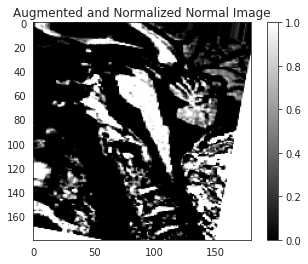

In [ ]:
sns.set_style('white')
generated_image, label = train.__getitem__(0)
plt.imshow(generated_image[0], cmap='gray')
plt.colorbar()
plt.title('Augmented and Normalized Normal Image')

print(f"The dimensions of the image are {generated_image.shape[1]} pixels width and {generated_image.shape[2]} pixels height, one single color channel.")
print(f"The maximum pixel value is {generated_image.max():.4f} and the minimum is {generated_image.min():.4f}")
print(f"The mean value of the pixels is {generated_image.mean():.4f} and the standard deviation is {generated_image.std():.4f}")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, ' Pixels in Image')

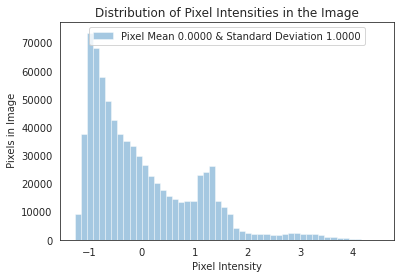

In [ ]:
sns.distplot(generated_image.ravel(),
            label=f"Pixel Mean {np.mean(generated_image):.4f} & Standard Deviation {np.std(generated_image):.4f}", kde=False)
plt.legend(loc='upper center')
plt.title('Distribution of Pixel Intensities in the Image')
plt.xlabel('Pixel Intensity')
plt.ylabel(' Pixels in Image')

In [ ]:
# Building a CNN model


In [ ]:
# Class weights

weight_for_0 = num_Diseased / (num_Normal + num_Diseased)
weight_for_1 = num_Normal / (num_Normal + num_Diseased)

class_weight = {0: weight_for_0, 1: weight_for_1}

print(f"Weight for class 0: {weight_for_0:.2f}")
print(f"Weight for class 1: {weight_for_1:.2f}")

Weight for class 0: 0.55
Weight for class 1: 0.45


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten, BatchNormalization


model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(180, 180, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(180, 180, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 178, 178, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 178, 178, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 176, 176, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 176, 176, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 88, 88, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 86, 86, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 86, 86, 64)        2

In [ ]:
r = model.fit(
    train, 
    epochs=100,
    validation_data=validation, 
    class_weight=class_weight,
    steps_per_epoch=32,
    validation_steps=32,
)

Epoch 1/100
32/32 [==============================] - 171s 4s/step - loss: 3.5158 - accuracy: 0.7556 - val_loss: 1.5467 - val_accuracy: 0.9062
Epoch 2/100
32/32 [==============================] - 11s 344ms/step - loss: 0.5286 - accuracy: 0.9422 - val_loss: 2.5258 - val_accuracy: 0.9062
Epoch 3/100
32/32 [==============================] - 4s 109ms/step - loss: 0.2297 - accuracy: 0.9427 - val_loss: 3.0895 - val_accuracy: 0.8750
Epoch 4/100
32/32 [==============================] - 3s 109ms/step - loss: 0.1781 - accuracy: 0.9048 - val_loss: 3.2006 - val_accuracy: 0.8438
Epoch 5/100
32/32 [==============================] - 3s 108ms/step - loss: 0.1238 - accuracy: 0.9554 - val_loss: 1.8525 - val_accuracy: 0.8750
Epoch 6/100
32/32 [==============================] - 4s 111ms/step - loss: 0.1917 - accuracy: 0.9019 - val_loss: 1.4528 - val_accuracy: 0.7500
Epoch 7/100
32/32 [==============================] - 4s 111ms/step - loss: 0.0874 - accuracy: 0.9788 - val_loss: 1.9261 - val_accuracy: 0.8125

Text(0.5, 1.0, 'Accuracy Evolution')

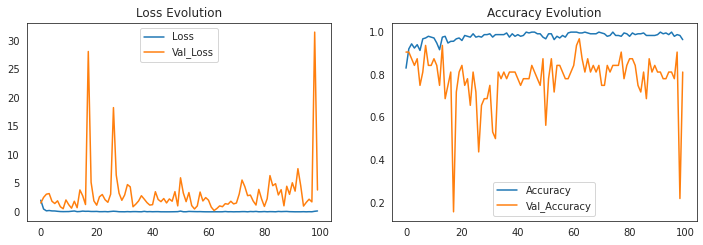

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [ ]:
evaluation = model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

83/83 [==============================] - 44s 539ms/step - loss: 6.9567 - accuracy: 0.7711
Test Accuracy: 77.11%
35/35 [==============================] - 3s 82ms/step - loss: 0.1420 - accuracy: 0.9892
Train Accuracy: 98.92%


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

pred = model.predict(test)

print(confusion_matrix(test.classes, pred > 0.5))
pd.DataFrame(classification_report(test.classes, pred > 0.5, output_dict=True))

[[56  0]
 [20  7]]


,0,1,accuracy,macro avg,weighted avg
precision,0.736842,1.000000,0.759036,0.868421,0.822448
recall,1.000000,0.259259,0.759036,0.629630,0.759036
f1-score,0.848485,0.411765,0.759036,0.630125,0.706419
support,56.000000,27.000000,0.759036,83.000000,83.000000


Transfer Learning

In [ ]:
#densenet
from keras.applications.densenet import DenseNet121
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras import backend as K

base_model = DenseNet121(input_shape=(180, 180, 3), include_top=False, weights='imagenet', pooling='avg')

base_model.summary()

29089792/29084464 [==============================] - 0s 0us/step
Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 180, 180, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 186, 186, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 90, 90, 64)   9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 90, 90, 64)   256         conv1/conv[0][0]                 
_______________________

In [ ]:

layers = base_model.layers
print(f"The model has {len(layers)} layers")

The model has 428 layers


In [ ]:
print(f"The input shape {base_model.input}")
print(f"The output shape {base_model.output}")

The input shape KerasTensor(type_spec=TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")
The output shape KerasTensor(type_spec=TensorSpec(shape=(None, 1024), dtype=tf.float32, name=None), name='avg_pool/Mean:0', description="created by layer 'avg_pool'")


In [ ]:
#model = Sequential()
base_model = DenseNet121(include_top=False, weights='imagenet')
x = base_model.output

x = GlobalAveragePooling2D()(x)

predictions = Dense(1, activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs=predictions)
#model.add(base_model)
#model.add(GlobalAveragePooling2D())
#model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [ ]:
r = model.fit(
    train, 
    epochs=100,
    validation_data=validation,
    class_weight=class_weight,
    steps_per_epoch=32,
    validation_steps=32,
)

Epoch 1/100
32/32 [==============================] - 26s 380ms/step - loss: 0.1582 - accuracy: 0.8768 - val_loss: 0.6114 - val_accuracy: 0.8438
Epoch 2/100
32/32 [==============================] - 7s 206ms/step - loss: 0.0972 - accuracy: 0.9498 - val_loss: 8.5420 - val_accuracy: 0.1562
Epoch 3/100
32/32 [==============================] - 7s 209ms/step - loss: 0.0205 - accuracy: 0.9836 - val_loss: 3.0239 - val_accuracy: 0.9375
Epoch 4/100
32/32 [==============================] - 7s 206ms/step - loss: 0.0308 - accuracy: 0.9669 - val_loss: 27.2950 - val_accuracy: 0.2500
Epoch 5/100
32/32 [==============================] - 7s 208ms/step - loss: 0.0318 - accuracy: 0.9871 - val_loss: 3.1450 - val_accuracy: 0.8438
Epoch 6/100
32/32 [==============================] - 7s 207ms/step - loss: 0.0528 - accuracy: 0.9764 - val_loss: 0.3923 - val_accuracy: 0.9688
Epoch 7/100
32/32 [==============================] - 7s 208ms/step - loss: 0.0075 - accuracy: 1.0000 - val_loss: 0.0997 - val_accuracy: 0.93

Text(0.5, 1.0, 'Accuracy Evolution')

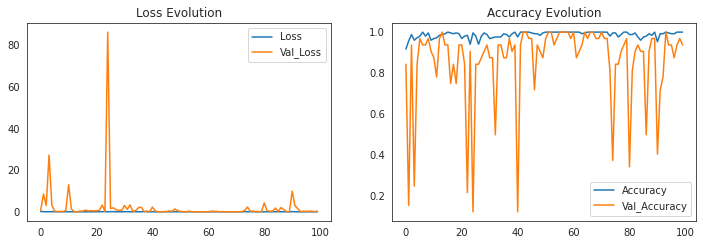

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [ ]:
evaluation = model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

83/83 [==============================] - 2s 29ms/step - loss: 0.3478 - accuracy: 0.8554
Test Accuracy: 85.54%
35/35 [==============================] - 3s 94ms/step - loss: 0.0066 - accuracy: 0.9964
Train Accuracy: 99.64%


In [ ]:

predicted_vals = model.predict(test, steps=len(test))

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

pred =  model.predict(test)

print(confusion_matrix(test.classes, pred > 0.5))
pd.DataFrame(classification_report(test.classes, pred > 0.5, output_dict=True))

[[56  0]
 [10 17]]


,0,1,accuracy,macro avg,weighted avg
precision,0.848485,1.000000,0.879518,0.924242,0.897773
recall,1.000000,0.629630,0.879518,0.814815,0.879518
f1-score,0.918033,0.772727,0.879518,0.845380,0.870765
support,56.000000,27.000000,0.879518,83.000000,83.000000


In [ ]:
from keras.applications import ResNet50

resnet_base_model = ResNet50(input_shape=(180,180,3), include_top=False, weights='imagenet')

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
resnet_base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 180, 180, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 186, 186, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 90, 90, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 90, 90, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
# from tensorflow.keras import Adam
resnet_model =Sequential([
        resnet_base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.6),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.4),
        Dense(64,activation="relu"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1,activation="sigmoid")
    ])

# opt = keras.Adam(  learning_rate  =lr_schedule(0))
METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
resnet_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=METRICS)

In [ ]:
r = resnet_model.fit(train,
          epochs=100,
          validation_data=validation,
          class_weight=class_weight,
          steps_per_epoch=32,
          validation_steps=32)

Epoch 1/100
32/32 [==============================] - 19s 320ms/step - loss: 0.2808 - accuracy: 0.7408 - precision: 0.7372 - recall: 0.7441 - val_loss: 30.6440 - val_accuracy: 0.1250 - val_precision: 0.1250 - val_recall: 1.0000
Epoch 2/100
32/32 [==============================] - 8s 234ms/step - loss: 0.1621 - accuracy: 0.8685 - precision: 0.8705 - recall: 0.8267 - val_loss: 0.3934 - val_accuracy: 0.8750 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/100
32/32 [==============================] - 7s 230ms/step - loss: 0.1349 - accuracy: 0.8925 - precision: 0.9085 - recall: 0.8727 - val_loss: 0.6761 - val_accuracy: 0.8750 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/100
32/32 [==============================] - 7s 231ms/step - loss: 0.1998 - accuracy: 0.8469 - precision: 0.9375 - recall: 0.7728 - val_loss: 91.0765 - val_accuracy: 0.1250 - val_precision: 0.1250 - val_recall: 1.0000
Epoch 5/100
32/32 [==============================] - 7s 231ms/step - loss: 0.1805

Text(0.5, 1.0, 'Accuracy Evolution')

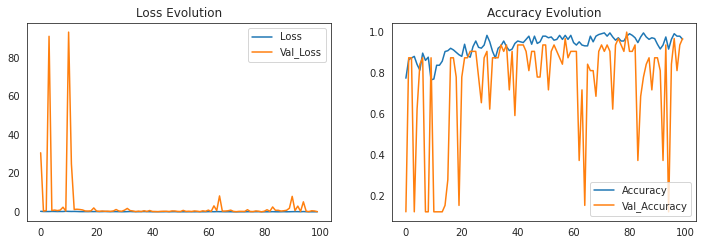

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [ ]:

evaluation =resnet_model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = resnet_model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

83/83 [==============================] - 2s 26ms/step - loss: 0.2241 - accuracy: 0.9277 - precision: 1.0000 - recall: 0.7778
Test Accuracy: 92.77%
35/35 [==============================] - 3s 97ms/step - loss: 0.0319 - accuracy: 0.9892 - precision: 1.0000 - recall: 0.9762
Train Accuracy: 98.92%


In [ ]:
predicted_vals = resnet_model.predict(test, steps=len(test))

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

pred = resnet_model.predict(test)

print(confusion_matrix(test.classes, pred > 0.5))
pd.DataFrame(classification_report(test.classes, pred > 0.5, output_dict=True))

[[56  0]
 [ 9 18]]


,0,1,accuracy,macro avg,weighted avg
precision,0.861538,1.000000,0.891566,0.930769,0.906580
recall,1.000000,0.666667,0.891566,0.833333,0.891566
f1-score,0.925620,0.800000,0.891566,0.862810,0.884756
support,56.000000,27.000000,0.891566,83.000000,83.000000


In [ ]:
# InceptionNet
from keras.applications import InceptionV3

inception_base_model = InceptionV3(input_shape=(180,180,3),include_top=False,weights='imagenet')

87916544/87910968 [==============================] - 4s 0us/step


In [ ]:
inception_model =Sequential([
        inception_base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.6),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.4),
        Dense(64,activation="relu"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1,activation="sigmoid")
    ])

# opt = tf.keras.optimizers.Adam(learning_rate=0.001)
METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
inception_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=METRICS)

In [ ]:
r = inception_model.fit(train,
          epochs=100,
          validation_data=validation,
          class_weight=class_weight,
          steps_per_epoch=32,
          validation_steps=32)

Epoch 1/100
32/32 [==============================] - 21s 338ms/step - loss: 0.3270 - accuracy: 0.7010 - precision: 0.6194 - recall: 0.7669 - val_loss: 0.4254 - val_accuracy: 0.8750 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
32/32 [==============================] - 6s 200ms/step - loss: 0.2108 - accuracy: 0.8099 - precision: 0.7569 - recall: 0.8534 - val_loss: 5.5164 - val_accuracy: 0.8750 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/100
32/32 [==============================] - 6s 200ms/step - loss: 0.2061 - accuracy: 0.8408 - precision: 0.8474 - recall: 0.8186 - val_loss: 6.8434 - val_accuracy: 0.8750 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/100
32/32 [==============================] - 6s 198ms/step - loss: 0.1675 - accuracy: 0.8745 - precision: 0.8925 - recall: 0.8253 - val_loss: 1.5139 - val_accuracy: 0.8750 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/100
32/32 [==============================] - 6s 199ms/step 

Text(0.5, 1.0, 'Accuracy Evolution')

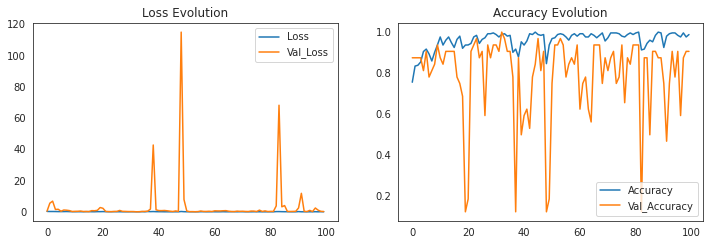

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [ ]:
evaluation =inception_model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = inception_model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

83/83 [==============================] - 3s 30ms/step - loss: 0.2010 - accuracy: 0.9157 - precision: 0.9545 - recall: 0.7778
Test Accuracy: 91.57%
35/35 [==============================] - 3s 94ms/step - loss: 0.4382 - accuracy: 0.8957 - precision: 0.9899 - recall: 0.7778
Train Accuracy: 89.57%


In [ ]:
predicted_vals =inception_model.predict(test, steps=len(test))

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

pred = inception_model.predict(test)

print(confusion_matrix(test.classes, pred > 0.5))
pd.DataFrame(classification_report(test.classes, pred > 0.5, output_dict=True))


[[56  0]
 [ 9 18]]


,0,1,accuracy,macro avg,weighted avg
precision,0.861538,1.000000,0.891566,0.930769,0.906580
recall,1.000000,0.666667,0.891566,0.833333,0.891566
f1-score,0.925620,0.800000,0.891566,0.862810,0.884756
support,56.000000,27.000000,0.891566,83.000000,83.000000


In [ ]:
# VGG16

In [ ]:
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D
from keras.applications import VGG16


vgg16_base_model = VGG16(input_shape=(180,180,3),include_top=False,weights='imagenet')

58892288/58889256 [==============================] - 2s 0us/step


In [ ]:
vgg16_base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 180, 180, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 180, 180, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 180, 180, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 90, 90, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 90, 90, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 90, 90, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 45, 45, 128)       0     

In [ ]:
vgg16_model = Sequential([
        vgg16_base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.6),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.4),
        Dense(64,activation="relu"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1,activation="sigmoid")
    ])


In [ ]:

# opt = tf.keras.optimizers.Adam(learning_rate=0.001)
METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
vgg16_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=METRICS)

In [ ]:

r = vgg16_model.fit(train,
          epochs=100,
          validation_data=validation,
          class_weight=class_weight,
          steps_per_epoch=32,
          validation_steps=32)

Epoch 1/100
32/32 [==============================] - 18s 411ms/step - loss: 0.4634 - accuracy: 0.5309 - precision: 0.5090 - recall: 0.5309 - val_loss: 30247.6387 - val_accuracy: 0.1250 - val_precision: 0.1250 - val_recall: 1.0000
Epoch 2/100
32/32 [==============================] - 8s 261ms/step - loss: 0.4061 - accuracy: 0.6237 - precision: 0.5978 - recall: 0.5914 - val_loss: 74.3279 - val_accuracy: 0.1250 - val_precision: 0.1250 - val_recall: 1.0000
Epoch 3/100
32/32 [==============================] - 8s 263ms/step - loss: 0.4441 - accuracy: 0.5183 - precision: 0.4879 - recall: 0.3868 - val_loss: 53.3446 - val_accuracy: 0.1250 - val_precision: 0.1250 - val_recall: 1.0000
Epoch 4/100
32/32 [==============================] - 8s 263ms/step - loss: 0.3788 - accuracy: 0.6019 - precision: 0.5183 - recall: 0.4981 - val_loss: 20.7333 - val_accuracy: 0.1250 - val_precision: 0.1250 - val_recall: 1.0000
Epoch 5/100
32/32 [==============================] - 8s 264ms/step - loss: 0.4207 - accuracy

Text(0.5, 1.0, 'Accuracy Evolution')

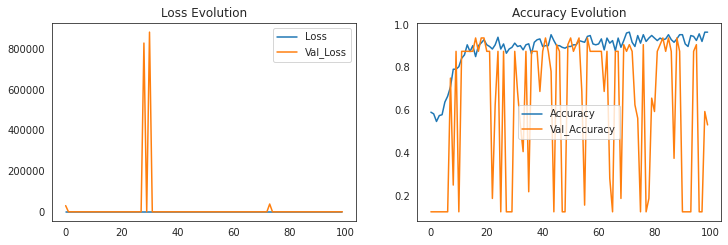

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [ ]:

evaluation =vgg16_model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = vgg16_model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

83/83 [==============================] - 2s 30ms/step - loss: 0.5369 - accuracy: 0.7590 - precision: 0.5745 - recall: 1.0000
Test Accuracy: 75.90%
35/35 [==============================] - 4s 102ms/step - loss: 0.1271 - accuracy: 0.9640 - precision: 0.9265 - recall: 1.0000
Train Accuracy: 96.40%


In [ ]:
predicted_vals = vgg16_model.predict(test, steps=len(test))

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

pred = vgg16_model.predict(test)

print(confusion_matrix(test.classes, pred > 0.5))
pd.DataFrame(classification_report(test.classes, pred > 0.5, output_dict=True))



[[41 15]
 [ 0 27]]


,0,1,accuracy,macro avg,weighted avg
precision,1.000000,0.642857,0.819277,0.821429,0.883821
recall,0.732143,1.000000,0.819277,0.866071,0.819277
f1-score,0.845361,0.782609,0.819277,0.813985,0.824947
support,56.000000,27.000000,0.819277,83.000000,83.000000


In [ ]:
# EfficentnetB0

In [ ]:
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D
from tensorflow.keras.applications import EfficientNetB0


EfficientNetB0_base_model = EfficientNetB0(input_shape=(180,180,3),include_top=False,weights='imagenet')

In [ ]:
EfficientNetB0_base_model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 180, 180, 3) 0                                            
__________________________________________________________________________________________________
rescaling_2 (Rescaling)         (None, 180, 180, 3)  0           input_11[0][0]                   
__________________________________________________________________________________________________
normalization_2 (Normalization) (None, 180, 180, 3)  7           rescaling_2[0][0]                
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 181, 181, 3)  0           normalization_2[0][0]            
_____________________________________________________________________________________

In [ ]:
EfficientNetB0_model = Sequential([
        EfficientNetB0_base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.6),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.4),
        Dense(64,activation="relu"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1,activation="sigmoid")
    ])


In [ ]:

# opt = tf.keras.optimizers.Adam(learning_rate=0.001)
METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
EfficientNetB0_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=METRICS)

In [ ]:
r = EfficientNetB0_model.fit(train,
          epochs=100,
          validation_data=validation,
          class_weight=class_weight,
          steps_per_epoch=32,
          validation_steps=32)

Epoch 1/100
32/32 [==============================] - 19s 266ms/step - loss: 0.3838 - accuracy: 0.5838 - precision: 0.5076 - recall: 0.5910 - val_loss: 0.7189 - val_accuracy: 0.1250 - val_precision: 0.1250 - val_recall: 1.0000
Epoch 2/100
32/32 [==============================] - 5s 162ms/step - loss: 0.1694 - accuracy: 0.8692 - precision: 0.8287 - recall: 0.8940 - val_loss: 0.8975 - val_accuracy: 0.1250 - val_precision: 0.1250 - val_recall: 1.0000
Epoch 3/100
32/32 [==============================] - 5s 163ms/step - loss: 0.1117 - accuracy: 0.9316 - precision: 0.9235 - recall: 0.9353 - val_loss: 1.3668 - val_accuracy: 0.1250 - val_precision: 0.1250 - val_recall: 1.0000
Epoch 4/100
32/32 [==============================] - 5s 165ms/step - loss: 0.1397 - accuracy: 0.8921 - precision: 0.9361 - recall: 0.8548 - val_loss: 1.7358 - val_accuracy: 0.1250 - val_precision: 0.1250 - val_recall: 1.0000
Epoch 5/100
32/32 [==============================] - 5s 166ms/step - loss: 0.1492 - accuracy: 0.869

Text(0.5, 1.0, 'Accuracy Evolution')

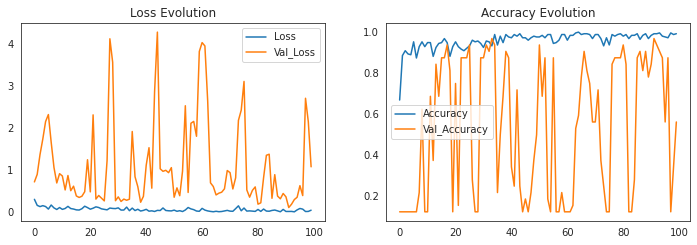

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [ ]:

evaluation =EfficientNetB0_model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = EfficientNetB0_model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

83/83 [==============================] - 2s 21ms/step - loss: 0.6418 - accuracy: 0.6145 - precision: 0.4561 - recall: 0.9630
Test Accuracy: 61.45%
35/35 [==============================] - 3s 96ms/step - loss: 0.3308 - accuracy: 0.8309 - precision: 0.7283 - recall: 1.0000
Train Accuracy: 83.09%


In [ ]:
predicted_vals = EfficientNetB0_model.predict(test, steps=len(test))

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

pred = EfficientNetB0_model.predict(test)

print(confusion_matrix(test.classes, pred > 0.8))
pd.DataFrame(classification_report(test.classes, pred > 0.8, output_dict=True))

[[44 12]
 [ 6 21]]


,0,1,accuracy,macro avg,weighted avg
precision,0.880000,0.636364,0.783133,0.758182,0.800745
recall,0.785714,0.777778,0.783133,0.781746,0.783133
f1-score,0.830189,0.700000,0.783133,0.765094,0.787838
support,56.000000,27.000000,0.783133,83.000000,83.000000


In [ ]:
# Xception

In [ ]:
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D
from tensorflow.keras.applications import Xception


Xception_base_model = Xception(input_shape=(180,180,3),include_top=False,weights='imagenet')

83689472/83683744 [==============================] - 3s 0us/step


In [ ]:
Xception_base_model.summary()

Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 180, 180, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 89, 89, 32)   864         input_7[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 89, 89, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 89, 89, 32)   0           block1_conv1_bn[0][0]            
___________________________________________________________________________________________

In [ ]:
Xception_model = Sequential([
        Xception_base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.6),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.4),
        Dense(64,activation="relu"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1,activation="sigmoid")
    ])


In [ ]:

# opt = tf.keras.optimizers.Adam(learning_rate=0.001)
METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
Xception_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=METRICS)

In [ ]:
r = Xception_model.fit(train,
          epochs=100,
          validation_data=validation,
          class_weight=class_weight,
          steps_per_epoch=32,
          validation_steps=32)

Epoch 1/100
32/32 [==============================] - 18s 326ms/step - loss: 0.2277 - accuracy: 0.7550 - precision: 0.7710 - recall: 0.6973 - val_loss: 1.1773 - val_accuracy: 0.2188 - val_precision: 0.1379 - val_recall: 1.0000
Epoch 2/100
32/32 [==============================] - 10s 326ms/step - loss: 0.1260 - accuracy: 0.9006 - precision: 0.9613 - recall: 0.8522 - val_loss: 5.1297 - val_accuracy: 0.5625 - val_precision: 0.1875 - val_recall: 0.7500
Epoch 3/100
32/32 [==============================] - 9s 271ms/step - loss: 0.2511 - accuracy: 0.8278 - precision: 0.8512 - recall: 0.7808 - val_loss: 0.8819 - val_accuracy: 0.7812 - val_precision: 0.3636 - val_recall: 1.0000
Epoch 4/100
32/32 [==============================] - 9s 273ms/step - loss: 0.1131 - accuracy: 0.9123 - precision: 0.9733 - recall: 0.8561 - val_loss: 4.4863 - val_accuracy: 0.7812 - val_precision: 0.3333 - val_recall: 0.7500
Epoch 5/100
32/32 [==============================] - 9s 275ms/step - loss: 0.1570 - accuracy: 0.86

Text(0.5, 1.0, 'Accuracy Evolution')

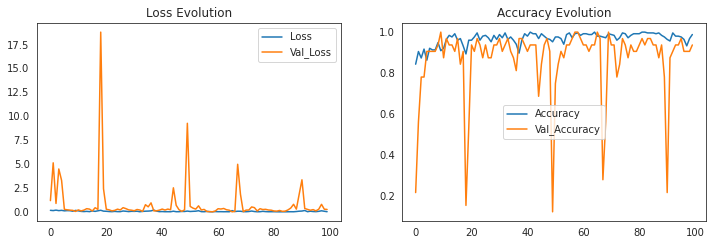

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [ ]:

evaluation =Xception_model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = Xception_model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

83/83 [==============================] - 2s 19ms/step - loss: 0.6315 - accuracy: 0.7590 - precision: 1.0000 - recall: 0.2593
Test Accuracy: 75.90%
35/35 [==============================] - 3s 94ms/step - loss: 0.1601 - accuracy: 0.9101 - precision: 1.0000 - recall: 0.8016
Train Accuracy: 91.01%


In [ ]:
predicted_vals = Xception_model.predict(test, steps=len(test))

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

pred = Xception_model.predict(test)

print(confusion_matrix(test.classes, pred > 0.5))
pd.DataFrame(classification_report(test.classes, pred > 0.5, output_dict=True))


[[56  0]
 [16 11]]


,0,1,accuracy,macro avg,weighted avg
precision,0.777778,1.000000,0.807229,0.888889,0.850067
recall,1.000000,0.407407,0.807229,0.703704,0.807229
f1-score,0.875000,0.578947,0.807229,0.726974,0.778694
support,56.000000,27.000000,0.807229,83.000000,83.000000


In [ ]:
# MobileNet

In [ ]:
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNet


MobileNet_base_model = MobileNet(input_shape=(180,180,3),include_top=False,weights='imagenet')

17227776/17225924 [==============================] - 0s 0us/step


In [ ]:
MobileNet_base_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 180, 180, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 90, 90, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 90, 90, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 90, 90, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 90, 90, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 90, 90, 32)        128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 90, 90, 32) 

In [ ]:
MobileNet_model = Sequential([
        MobileNet_base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.6),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.4),
        Dense(64,activation="relu"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1,activation="sigmoid")
    ])

In [ ]:
METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
MobileNet_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=METRICS)

In [ ]:
r = MobileNet_model.fit(train,
          epochs=100,
          validation_data=validation,
          class_weight=class_weight,
          steps_per_epoch=32,
          validation_steps=32)

Epoch 1/100
32/32 [==============================] - 10s 163ms/step - loss: 0.3356 - accuracy: 0.6317 - precision: 0.5746 - recall: 0.6343 - val_loss: 4.2151 - val_accuracy: 0.1250 - val_precision: 0.1250 - val_recall: 1.0000
Epoch 2/100
32/32 [==============================] - 4s 115ms/step - loss: 0.1099 - accuracy: 0.9107 - precision: 0.9107 - recall: 0.8871 - val_loss: 2.2951 - val_accuracy: 0.2812 - val_precision: 0.1481 - val_recall: 1.0000
Epoch 3/100
32/32 [==============================] - 4s 113ms/step - loss: 0.0947 - accuracy: 0.9322 - precision: 0.9270 - recall: 0.9319 - val_loss: 0.9068 - val_accuracy: 0.5000 - val_precision: 0.2000 - val_recall: 1.0000
Epoch 4/100
32/32 [==============================] - 4s 114ms/step - loss: 0.1258 - accuracy: 0.9033 - precision: 0.9016 - recall: 0.9041 - val_loss: 1.3682 - val_accuracy: 0.4062 - val_precision: 0.1739 - val_recall: 1.0000
Epoch 5/100
32/32 [==============================] - 4s 113ms/step - loss: 0.1539 - accuracy: 0.902

Text(0.5, 1.0, 'Accuracy Evolution')

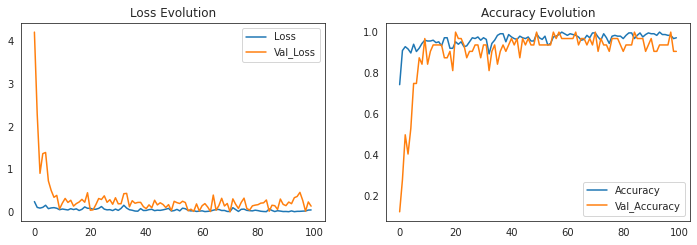

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [ ]:

evaluation =MobileNet_model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = MobileNet_model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

83/83 [==============================] - 1s 14ms/step - loss: 0.1314 - accuracy: 0.9398 - precision: 0.9583 - recall: 0.8519
Test Accuracy: 93.98%
35/35 [==============================] - 3s 80ms/step - loss: 0.0120 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000
Train Accuracy: 100.00%


In [ ]:
predicted_vals = MobileNet_model.predict(test, steps=len(test))

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

pred = MobileNet_model.predict(test)

print(confusion_matrix(test.classes, pred > 0.5))
pd.DataFrame(classification_report(test.classes, pred > 0.5, output_dict=True))


[[56  0]
 [ 5 22]]


,0,1,accuracy,macro avg,weighted avg
precision,0.918033,1.000000,0.939759,0.959016,0.944697
recall,1.000000,0.814815,0.939759,0.907407,0.939759
f1-score,0.957265,0.897959,0.939759,0.927612,0.937973
support,56.000000,27.000000,0.939759,83.000000,83.000000


In [ ]:
# InceptionResNetV2

In [ ]:
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D
from tensorflow.keras.applications import InceptionResNetV2


InceptionResNetV2_base_model = InceptionResNetV2(input_shape=(180,180,3),include_top=False,weights='imagenet')

219062272/219055592 [==============================] - 9s 0us/step


In [ ]:
InceptionResNetV2_base_model.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 180, 180, 3) 0                                            
__________________________________________________________________________________________________
conv2d_104 (Conv2D)             (None, 89, 89, 32)   864         input_9[0][0]                    
__________________________________________________________________________________________________
batch_normalization_122 (BatchN (None, 89, 89, 32)   96          conv2d_104[0][0]                 
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 89, 89, 32)   0           batch_normalization_122[0][0]    
________________________________________________________________________________

In [ ]:
InceptionResNetV2_model = Sequential([
        InceptionResNetV2_base_model,
        GlobalAveragePooling2D(),
        Dense(512, activation="relu"),
        BatchNormalization(),
        Dropout(0.6),
        Dense(128, activation="relu"),
        BatchNormalization(),
        Dropout(0.4),
        Dense(64,activation="relu"),
        BatchNormalization(),
        Dropout(0.3),
        Dense(1,activation="sigmoid")
    ])

In [ ]:
METRICS = [
        'accuracy',
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
InceptionResNetV2_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=METRICS)

In [ ]:
r = InceptionResNetV2_model.fit(train,
          epochs=100,
          validation_data=validation,
          class_weight=class_weight,
          steps_per_epoch=32,
          validation_steps=32)

Epoch 1/100
32/32 [==============================] - 41s 613ms/step - loss: 0.3063 - accuracy: 0.7136 - precision: 0.6201 - recall: 0.6924 - val_loss: 15.2574 - val_accuracy: 0.1250 - val_precision: 0.1250 - val_recall: 1.0000
Epoch 2/100
32/32 [==============================] - 14s 435ms/step - loss: 0.1634 - accuracy: 0.8651 - precision: 0.8565 - recall: 0.8699 - val_loss: 1.1567 - val_accuracy: 0.3438 - val_precision: 0.1304 - val_recall: 0.7500
Epoch 3/100
32/32 [==============================] - 14s 436ms/step - loss: 0.1691 - accuracy: 0.8868 - precision: 0.8911 - recall: 0.8691 - val_loss: 0.8602 - val_accuracy: 0.6250 - val_precision: 0.1667 - val_recall: 0.5000
Epoch 4/100
32/32 [==============================] - 14s 434ms/step - loss: 0.1084 - accuracy: 0.9117 - precision: 0.8993 - recall: 0.9007 - val_loss: 0.2451 - val_accuracy: 0.9375 - val_precision: 1.0000 - val_recall: 0.5000
Epoch 5/100
32/32 [==============================] - 14s 437ms/step - loss: 0.0977 - accuracy: 

Text(0.5, 1.0, 'Accuracy Evolution')

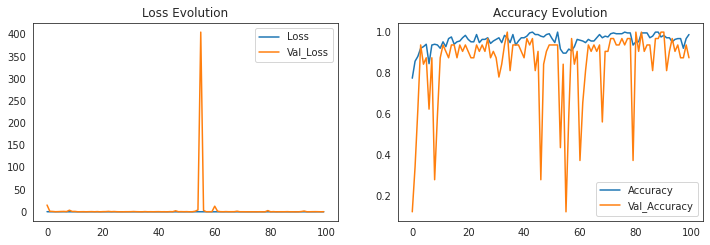

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(r.history['accuracy'], label='Accuracy')
plt.plot(r.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [ ]:

evaluation =InceptionResNetV2_model.evaluate(test)
print(f"Test Accuracy: {evaluation[1] * 100:.2f}%")

evaluation = InceptionResNetV2_model.evaluate(train)
print(f"Train Accuracy: {evaluation[1] * 100:.2f}%")

83/83 [==============================] - 5s 62ms/step - loss: 0.1900 - accuracy: 0.9277 - precision: 0.8387 - recall: 0.9630
Test Accuracy: 92.77%
35/35 [==============================] - 4s 110ms/step - loss: 0.0223 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000
Train Accuracy: 100.00%


In [ ]:
predicted_vals = InceptionResNetV2_model.predict(test, steps=len(test))

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

pred = InceptionResNetV2_model.predict(test)

print(confusion_matrix(test.classes, pred > 0.5))
pd.DataFrame(classification_report(test.classes, pred > 0.5, output_dict=True))


[[53  3]
 [ 4 23]]


,0,1,accuracy,macro avg,weighted avg
precision,0.929825,0.884615,0.915663,0.907220,0.915118
recall,0.946429,0.851852,0.915663,0.899140,0.915663
f1-score,0.938053,0.867925,0.915663,0.902989,0.915240
support,56.000000,27.000000,0.915663,83.000000,83.000000
